# Project: Investigating the IMDB Dataset (Genres)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report we will be examining the movies have the highest budget, highest popularity, and highest revenue based on the single independent variable genre.

### Importing packages and loading dataframe

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [164]:
df.shape

(10866, 21)

In [165]:
df.sample(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4259,11318,tt0110428,0.432776,0,0,The Madness of King George,Nigel Hawthorne|Helen Mirren|Ian Holm|Rupert G...,NaN,Nicholas Hytner,NaN,...,"Nicholas Hytnerâ€™s much awarded 1994 drama, b...",107,Comedy|Drama|History,Channel Four Films|Samuel Goldwyn Company|Clos...,12/28/94,27,6.5,1994,0.0,0.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning 

Removing unecessary columns

In [167]:
df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
        'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year',
        'budget_adj', 'revenue_adj'], axis=1, inplace=True)

Removing movies with missing budget and revenue values

In [168]:
df = df.replace(0, np.nan)
df = df.dropna(how='any', axis=0)

Changing budget and revenue columns for more readability

In [169]:
df['revenue'] = (df['revenue']/1000)
df['budget'] = (df['budget']/1000)
df.rename(index=str, columns={'revenue':'revenue_(thousands)','budget':'budget_(thousands)'})

,id,popularity,budget_(thousands),revenue_(thousands),original_title,genres
0,135397,32.985763,150000.000,1513528.810,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,76341,28.419936,150000.000,378436.354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
2,262500,13.112507,110000.000,295238.201,Insurgent,Adventure|Science Fiction|Thriller
3,140607,11.173104,200000.000,2068178.225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy
4,168259,9.335014,190000.000,1506249.360,Furious 7,Action|Crime|Thriller
5,281957,9.110700,135000.000,532950.503,The Revenant,Western|Drama|Adventure|Thriller
6,87101,8.654359,155000.000,440603.537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure
7,286217,7.667400,108000.000,595380.321,The Martian,Drama|Adventure|Science Fiction
8,211672,7.404165,74000.000,1156730.962,Minions,Family|Animation|Adventure|Comedy
9,150540,6.326804,175000.000,853708.609,Inside Out,Comedy|Animation|Family


Function to separate movies into the main genres; action, comedy, romance, drama, thriller, horror

In [170]:
# seperate sub dfs were created to contain movies of the same genre.
# movies with multiple genres get appeneded to multiple dataframes

columns = ['id', 'popularity', 'budget', 'revenue', 'original_title', 'genres']

action_df = pd.DataFrame(columns=columns)
comedy_df = pd.DataFrame(columns=columns)
romance_df = pd.DataFrame(columns=columns)
drama_df = pd.DataFrame(columns=columns)
thriller_df = pd.DataFrame(columns=columns)
horror_df = pd.DataFrame(columns=columns)

for index, row in df.iterrows():
    genres = row['genres']
    if 'Action' in genres:
        action_df = action_df.append(row)
    elif 'Comedy' in genres:
        comedy_df = comedy_df.append(row)
    elif 'Romance' in genres:
        romance_df = romance_df.append(row)
    elif 'Drama' in genres:
        drama_df = drama_df.append(row)
    elif 'Thriller' in genres:
        thriller_df = thriller_df.append(row)
    elif 'Horror' in genres:
        horror_df = horror_df.append(row)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How many occurances are there for each movie genre?)

Text(0,0.5,'Movie Count')

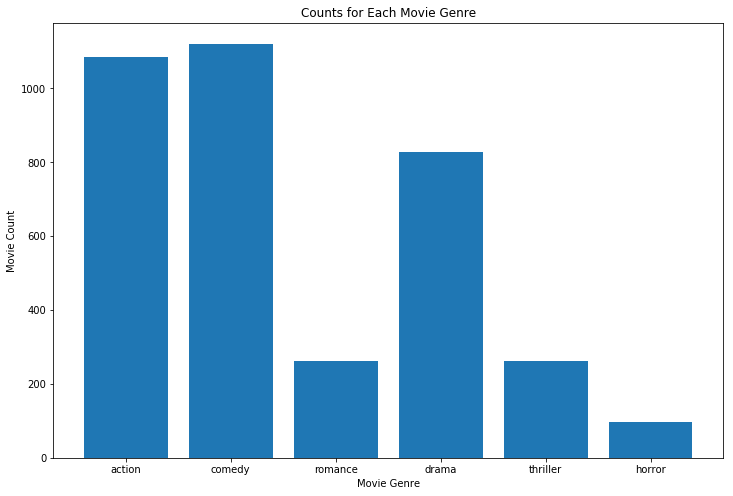

In [173]:
num_action_movies = action_df.shape[0]
num_comedy_movies = comedy_df.shape[0]
num_romance_movies = romance_df.shape[0]
num_drama_movies = drama_df.shape[0]
num_thriller_movies = thriller_df.shape[0]
num_horror_movies = horror_df.shape[0]

movie_counts = [num_action_movies, num_comedy_movies, num_romance_movies, num_drama_movies,
               num_thriller_movies, num_horror_movies]

locations = [1, 2, 3, 4, 5, 6]
heights = movie_counts
labels = ['action', 'comedy', 'romance', 'drama', 'thriller', 'horror']
plt.bar(locations, heights, tick_label=labels)
plt.title('Counts for Each Movie Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Movie Count')

### Research Question 2 (What are the distributions of the values; popularty, budget, and revenue?)

Text(0.5,1,'Distribution of Popularity')

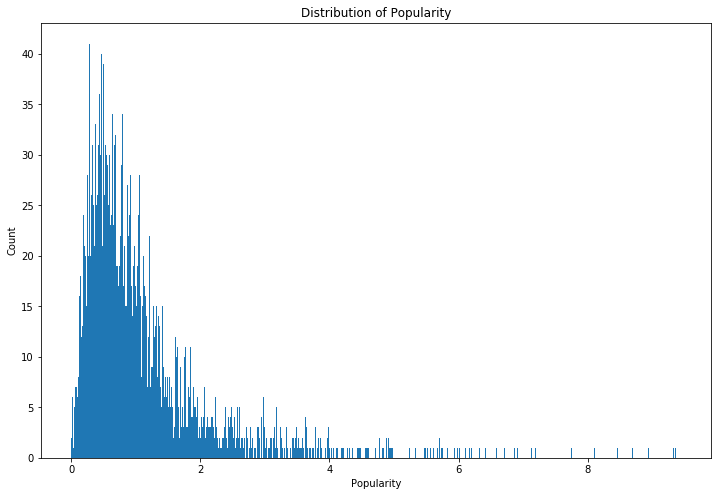

In [181]:
df2 = df.query('popularity < 10')
plt.hist(df2['popularity'], bins=1000)
plt.ylabel('Count')
plt.xlabel('Popularity')
plt.title('Distribution of Popularity')

Text(0.5,1,'Distribution of Budget')

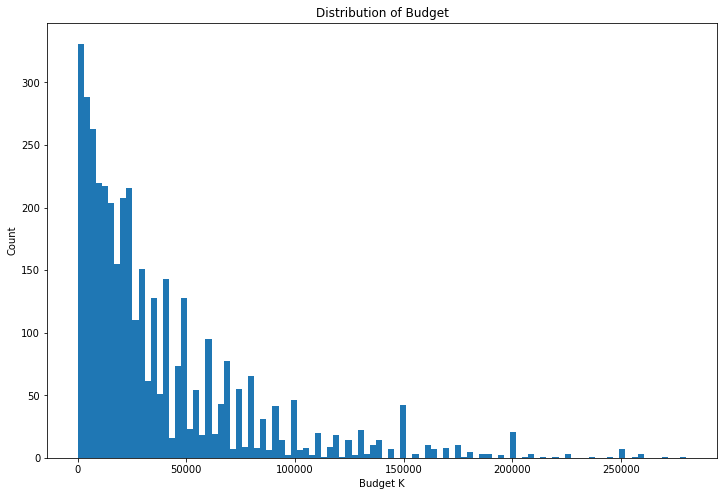

In [195]:
df3 = df.query('budget < 300000')
plt.hist(df3['budget'], bins=100)
plt.ylabel('Count')
plt.xlabel('Budget K')
plt.title('Distribution of Budget')

Text(0.5,1,'Distribution of Revenue')

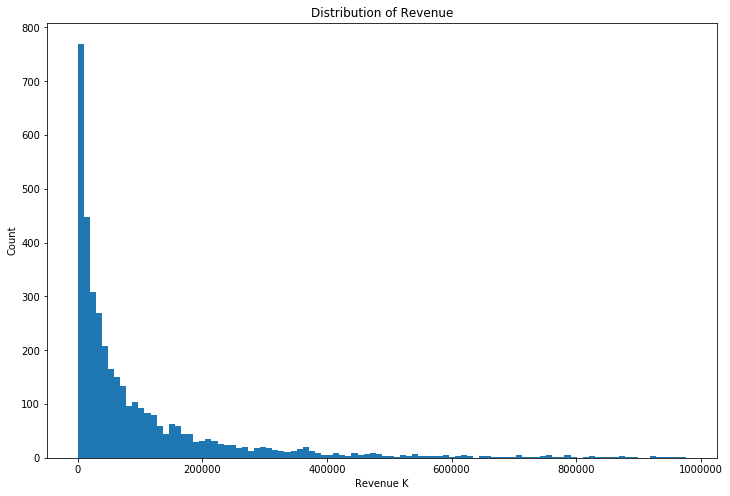

In [202]:
df4 = df.query('revenue < 1000000')
plt.hist(df4['revenue'], bins=100)
plt.ylabel('Count')
plt.xlabel('Revenue K')
plt.title('Distribution of Revenue')

### Research Question 2  (How do different genres correlate to popularity, budget, and revenue?)

Text(0,0.5,'Average Movie Popularity')

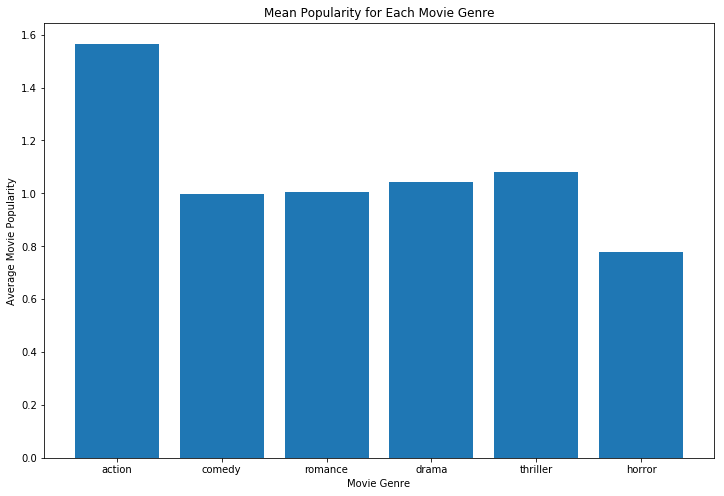

In [205]:
action_mean = action_df['popularity'].mean()
comedy_mean = comedy_df['popularity'].mean()
romance_mean = romance_df['popularity'].mean()
drama_mean = drama_df['popularity'].mean()
thriller_mean = thriller_df['popularity'].mean()
horror_mean = horror_df['popularity'].mean()

movie_means = [action_mean, comedy_mean, romance_mean, drama_mean, thriller_mean, horror_mean]

locations = [1, 2, 3, 4, 5, 6]
heights = movie_means
labels = ['action', 'comedy', 'romance', 'drama', 'thriller', 'horror']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean Popularity for Each Movie Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Average Movie Popularity')

Text(0,0.5,'Average Movie Budget (thousands)')

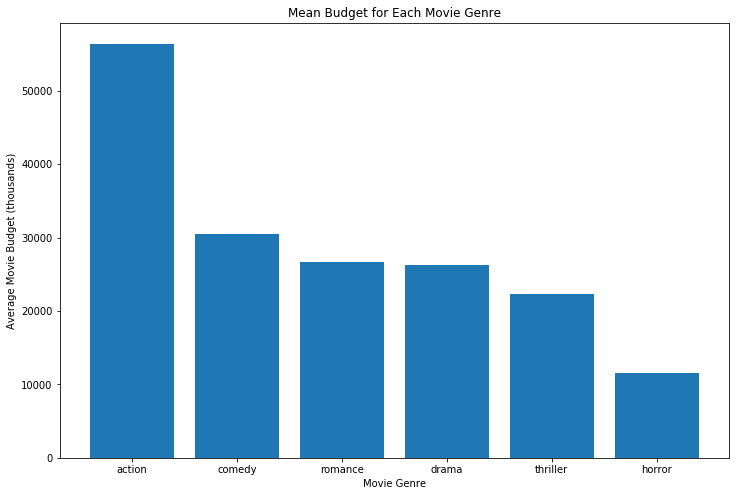

In [212]:
action_mean = action_df['budget'].mean()
comedy_mean = comedy_df['budget'].mean()
romance_mean = romance_df['budget'].mean()
drama_mean = drama_df['budget'].mean()
thriller_mean = thriller_df['budget'].mean()
horror_mean = horror_df['budget'].mean()

movie_means = [action_mean, comedy_mean, romance_mean, drama_mean, thriller_mean, horror_mean]

locations = [1, 2, 3, 4, 5, 6]
heights = movie_means
labels = ['action', 'comedy', 'romance', 'drama', 'thriller', 'horror']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean Budget for Each Movie Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Average Movie Budget (thousands)')

Text(0,0.5,'Average Movie Revenue (thouands)')

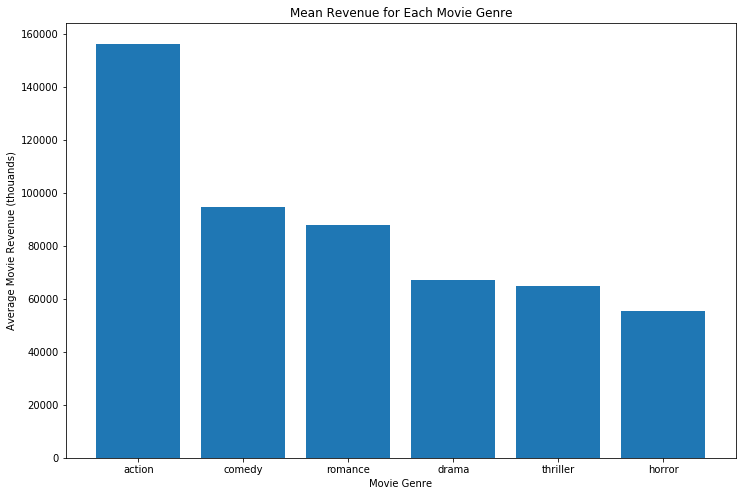

In [213]:
action_mean = action_df['revenue'].mean()
comedy_mean = comedy_df['revenue'].mean()
romance_mean = romance_df['revenue'].mean()
drama_mean = drama_df['revenue'].mean()
thriller_mean = thriller_df['revenue'].mean()
horror_mean = horror_df['revenue'].mean()

movie_means = [action_mean, comedy_mean, romance_mean, drama_mean, thriller_mean, horror_mean]

locations = [1, 2, 3, 4, 5, 6]
heights = movie_means
labels = ['action', 'comedy', 'romance', 'drama', 'thriller', 'horror']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean Revenue for Each Movie Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Average Movie Revenue (thouands)')

<a id='conclusions'></a>
## Conclusions

Before the data was analyzed, it was wrangled in order to produce more reliable data.  Movies with a budget of zero and/or revenue of zero were removed before the analysis as it was assumed that values of zero represented missing data.  The data was also divided into six main categories; action, comedy, romance, drama, thriller, and horror.  Other genres were removed due to the fact that they were insignificantly represented compared to the other genres.

As a result of the analysis, it has been found that action movies can be generally regarded as the movies with the highest budgets, revenues, and popularity ratings.  In contrast, horror movies have been found to be movies with the lowest budgets, revenues, and popularity ratings.  One weakness in this study was that movies with multiple genres were included in the analysis.  This could have smoothed out the visualizations of the data and prevented more accurate contrasts between the grenres from being seen.  Another weakness in this study was that the movies included in this analysis were originated over the span of several decades, from the beginning of the 20th century to present day.  Therefore budget and revenue data may be misleading as it does not take inflation into account in order to accurately compare the budgets and revenues of each movie.